<h2><a href="https://leetcode.com/problems/satisfiability-of-equality-equations">990. Satisfiability of Equality Equations</a></h2><h3>Medium</h3><hr><p>You are given an array of strings <code>equations</code> that represent relationships between variables where each string <code>equations[i]</code> is of length <code>4</code> and takes one of two different forms: <code>&quot;x<sub>i</sub>==y<sub>i</sub>&quot;</code> or <code>&quot;x<sub>i</sub>!=y<sub>i</sub>&quot;</code>.Here, <code>x<sub>i</sub></code> and <code>y<sub>i</sub></code> are lowercase letters (not necessarily different) that represent one-letter variable names.</p>

<p>Return <code>true</code><em> if it is possible to assign integers to variable names so as to satisfy all the given equations, or </em><code>false</code><em> otherwise</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> equations = [&quot;a==b&quot;,&quot;b!=a&quot;]
<strong>Output:</strong> false
<strong>Explanation:</strong> If we assign say, a = 1 and b = 1, then the first equation is satisfied, but not the second.
There is no way to assign the variables to satisfy both equations.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> equations = [&quot;b==a&quot;,&quot;a==b&quot;]
<strong>Output:</strong> true
<strong>Explanation:</strong> We could assign a = 1 and b = 1 to satisfy both equations.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= equations.length &lt;= 500</code></li>
	<li><code>equations[i].length == 4</code></li>
	<li><code>equations[i][0]</code> is a lowercase letter.</li>
	<li><code>equations[i][1]</code> is either <code>&#39;=&#39;</code> or <code>&#39;!&#39;</code>.</li>
	<li><code>equations[i][2]</code> is <code>&#39;=&#39;</code>.</li>
	<li><code>equations[i][3]</code> is a lowercase letter.</li>
</ul>


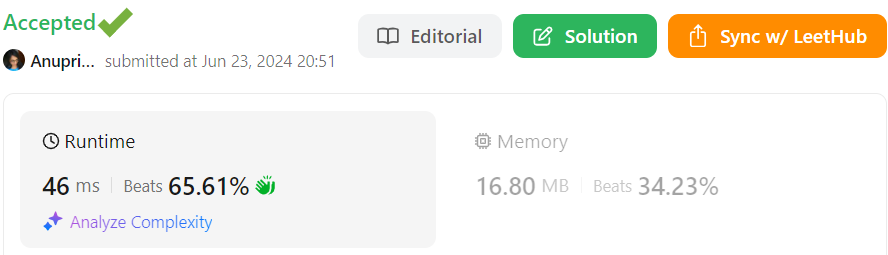

In [1]:
from typing import List
class Solution:
    def equationsPossible(self, equations: List[str]) -> bool:
        uf = UnionFind(26)

        for eq in equations:
            var = eq.split('==')
            if len(var) > 1:
                var[0] = ord(var[0]) - ord('a')     # we are substracting it by ord('a') , so that we gte nodes as 0, 1,2 etc.
                var[1] = ord(var[1]) - ord('a')
                uf.union(var[0], var[1])    # Doing union will update the root list


        for eq in equations:
            var = eq.split('!=')
            if len(var) > 1:
                var[0] = ord(var[0]) - ord('a')
                var[1] = ord(var[1]) - ord('a')
                if uf.find_root_parent(var[0]) == uf.find_root_parent(var[1]):    # if the equation is inequality and ultimate parent of both node are same , 
                    return False                                                   # then inequality is contradiction, hence we return False

        return True

class UnionFind:
    def __init__(self, size):
        self.root = list(range(size + 1))
        self.rank = [1] * size

    def find_root_parent(self, node):
        if self.root[node] == node:
            return node

        self.root[node] = self.find_root_parent(self.root[node])
        return self.root[node]


    def union(self, u, v):
        root_u = self.find_root_parent(u)
        root_v = self.find_root_parent(v)

        if root_u == root_v:
            return

        if self.rank[root_u] > self.rank[root_v]:
            self.root[root_v] = root_u
        elif self.rank[root_v] > self.rank[root_u]:
            self.root[root_u] = root_v
        else:
            self.root[root_v] = root_u
            self.rank[root_u] += 1